## 1. Business Understanding

SyriaTel, a telecommunications company, faces a significant challenge with customer churn, which directly impacts its revenue and profitability. The goal of this project is **to develop a predictive model that can accurately identify customers who are at risk of leaving the service in the near future**. 

By understanding the factors that drive customer churn, SyriaTel can implement targeted retention strategies, such as personalized offers, enhanced customer support, and proactive engagement, to reduce churn rates and increase customer lifetime value. The success of this initiative will not only improve customer loyalty but also optimize marketing and operational efforts, ultimately driving sustainable business growth. Identifying churn patterns and understanding the underlying causes will enable SyriaTel to take timely and effective actions, ensuring a competitive edge in the market.

### Objective : 
>>> **To develop a predictive model that can accurately identify customer churn.**

To fulfill the above objective, there are a few questions we need to answer, such as :
* What is the distribution of churn in our dataset?
* What factors contibute most to customer churn?
* 

## 2. Data Understanding

This project utilizes [this dataset from kaggle.](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). Each record is a customer
This dataset contains 3333 records and 21 columns.

The dataset contains a variety of features: 
* `state` - categorical variable denoting the state a customer is registered in.
* `account length` - The duration of the customer's account in terms of days.
* `area code` - The area code associated with the customer's phone number.
* `international plan` -  Whether the customer has an international calling plan (Yes/No).
* `voice mail plan` -  Whether the customer has a voice mail plan (Yes/No).
* `number of voicemail messages` - The number of voicemail messages the customer has.
* `total day minutes` - The total number of minutes the customer used during the daytime.
* `total day calls` - The total number of calls made by the customer during the daytime.
* `total day charge` - The total charge for daytime usage.
* `total evening minutes` - The total number of minutes the customer used during the evening.
* `total evening calls` - The total number of calls made by the customer during the evening.
* `total evening charge` - The total charge for evening usage.
* `total night minutes` - The total number of minutes the customer used during the night.
* `total night calls` - The total number of calls made by the customer during the night.
* `total night charge` - The total charge for night usage.
* `total international minutes` - The total number of international minutes used by the customer.
* `total international calls` - The total number of international calls made by the customer.
* `total international charge` - The total charge for international usage.
* `number of customer service calls` - The number of customer service calls made by the customer.
* `churn` - The target variable indicating whether the customer has churned or not (Yes/No).

For this project, we are trying to predict `Churn`, hence it is our target variable.

## 3. Data Preparation

### 3.1 Reading the Data

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load the dataset
churn_df = pd.read_csv('data/telecom_churn_dataset.csv')
# preview first five rows
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


From previewing the dataset above,  I noticed the column names are separated by spaces. Here, I replace them with underscores for easier readability and convention purposes.

In [3]:
# replace spaces with undescores in column names
churn_df.columns = churn_df.columns.str.replace(' ', '_')
# churn_df.head()

### 3.2 Understanding the Dataset

Here, we aim to undestand the structure of our dataset. This involves checking the number of rows and columns, the datatypes of our columns and previewing the dataset.

In [4]:
# print shape of the dataset
churn_df.shape

(3333, 21)

In [5]:
# get basic information of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Our dataset has 3,333 records and 21 columns. We notice that `area_code` is of the integer datatype. This is should be transformed to a categorical variable. 

### 3.3 Checking for missing values  and duplicates

In [6]:
# check for missing values in the dataset
churn_df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [7]:
# check for duplicate records
churn_df.duplicated().sum()

0

From the above process, we notice that we do not have any missing values or duplicate records. 

In [8]:
# Convert 'area code' from int to categorical
churn_df['area_code'] = churn_df['area_code'].astype('object')

# Verify the change
print(churn_df['area_code'].dtype)


object


In [9]:
# summary statistics of our dataset
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total_night_calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


### 3.4 Checking for outliers 
Outliers can often skew our analysis and models generated using the data. It is therefore important to check if they exist and deal with them.

Here, I will use the Interquartile Range (IQR) method to check for outliers in the numeric columns.

In [10]:
# # Using IQR method to remove outliers. Write function to remove outliers from a dataset using the IQR method.
    
# def remove_outliers(df, column):
#     # Check if the column is numeric
#     if df[column].dtype in ['float64', 'int64']:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     # Always return the DataFrame
#     return df


In [11]:

# columns_int = churn_df.columns

# # Start with the original DataFrame and apply outlier removal iteratively
# churn_without_outliers = churn_df.copy()
# for col in columns_int:
#     churn_without_outliers = remove_outliers(churn_without_outliers, col)
    
# # Check the shape of the DataFrame without outliers
# print(churn_without_outliers.shape)

## 4. Exploratory Data Analysis 

### 4.1 Univariate Analysis

This involves the examination of a single variable. The primary objective is to describe the data and find patterns within it. It helps us understand the central tendency, the distribution and spread of our data.

To do so, we will use distribution plots such as histograms, Box plots and bar plots.

#### 4.1.1 Distribution of `churn` in our dataset (target variable)

In [12]:
# churn distibution
churn_distribution = churn_df['churn'].value_counts()
churn_distribution

churn
False    2850
True      483
Name: count, dtype: int64

In [13]:
churn_distribution = churn_df['churn'].value_counts(normalize = True)
churn_distribution

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

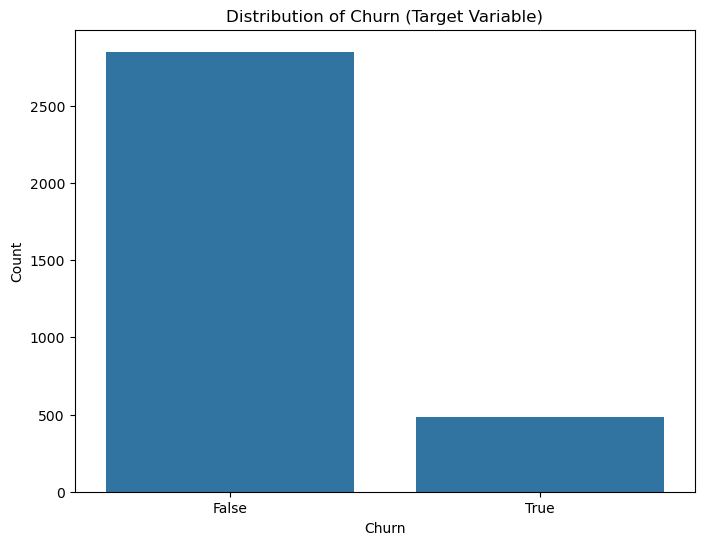

In [14]:
# plot the churn distribution (target variable)

plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=churn_df)
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Out of the 3,333 customers 483 have terminated their contract i.e., about 14.5% of customers lost.

Moreover, we notice that this dataset is highly imbalanced, with a much larger number of non-churned customers (2,850) compared to churned customers (483).This imbalance is common in churn prediction problems, where the majority of customers typically do not churn.

This implies that if our model always predicted that a customer will not churn(majority class), the model would be about 89.1% accurate. 

We shall implement strategies to remedy this imbalance.

#### 4.1.2 Distribution of categorical features

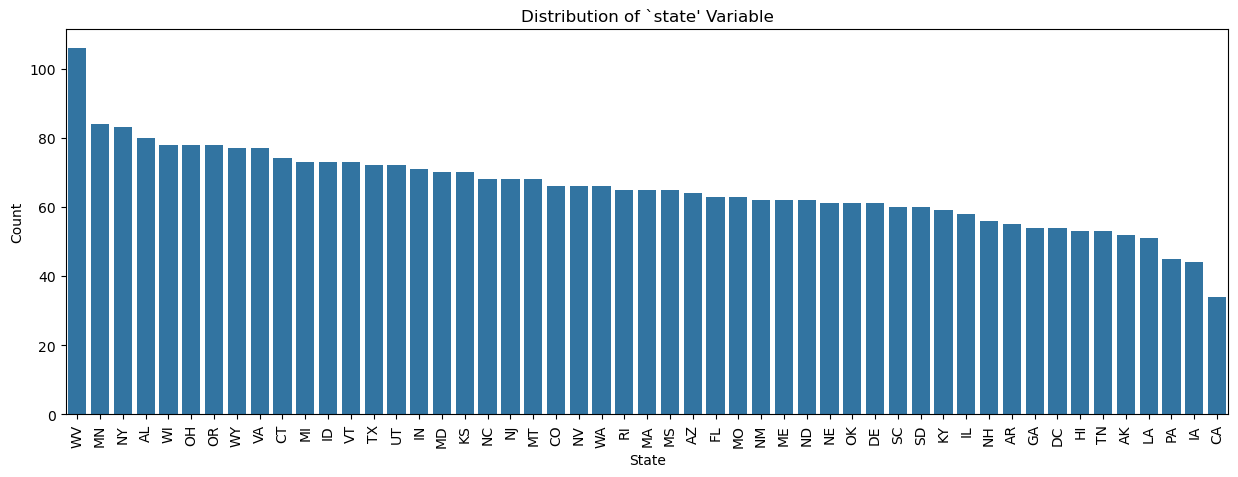

In [26]:
# plot distribution of `state`
plt.figure(figsize=(15,5))
sns.countplot(x='state', data=churn_df, order=churn_df['state'].value_counts().index)
plt.title("Distribution of `state' Variable")
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [15]:
churn_df['area_code'].value_counts(normalize = True)

area_code
415    0.496550
510    0.252025
408    0.251425
Name: proportion, dtype: float64

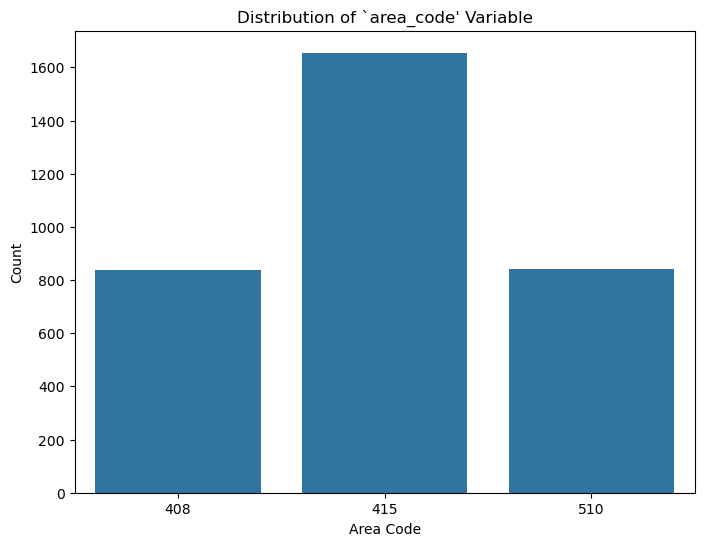

In [16]:
# plot distribution of `area_code`
plt.figure(figsize=(8, 6))
sns.countplot(x='area_code', data=churn_df)
plt.title("Distribution of `area_code' Variable")
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

We notice that about 49.7% of our customers are from `area_code` 415, 25.2% from `area_code` 510 and 25.1% from `area_code`408.

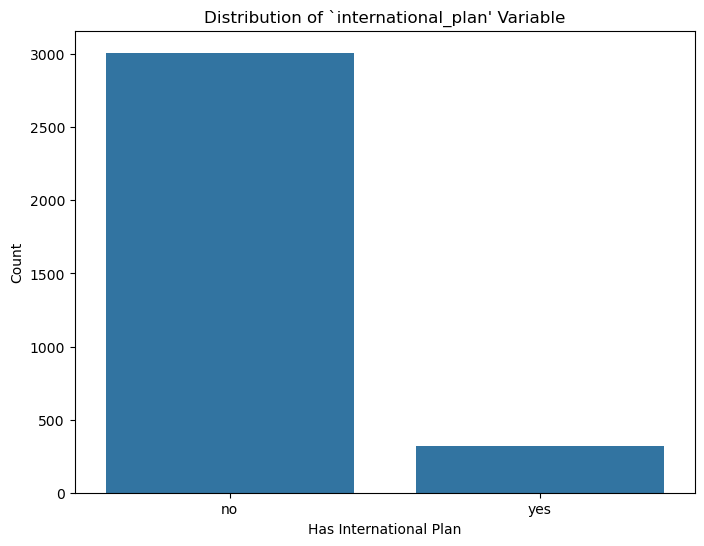

In [17]:
# plot distribution of `international_plan`
plt.figure(figsize=(8, 6))
sns.countplot(x='international_plan', data=churn_df)
plt.title("Distribution of `international_plan' Variable")
plt.xlabel('Has International Plan')
plt.ylabel('Count')
plt.show()

In [18]:
churn_df['international_plan'].value_counts(normalize = True)

international_plan
no     0.90309
yes    0.09691
Name: proportion, dtype: float64

About 90.3% of our customers do not have an international plan while only 9.7% have the plan.

In [19]:
churn_df['voice_mail_plan'].value_counts(normalize = True)


voice_mail_plan
no     0.723372
yes    0.276628
Name: proportion, dtype: float64

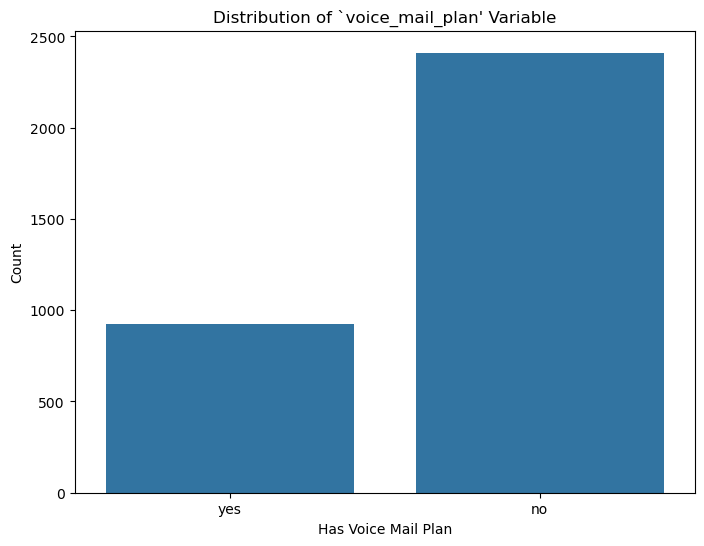

In [20]:
# plot distribution of voice_mail_plan
plt.figure(figsize=(8, 6))
sns.countplot(x='voice_mail_plan', data=churn_df)
plt.title("Distribution of `voice_mail_plan' Variable")
plt.xlabel('Has Voice Mail Plan')
plt.ylabel('Count')
plt.show()

About 27.7% of our customers have a voice mail plan with a majority (about 72.3%) not having a voice mail plan.

#### 4.1.3 Distribution of numerical features

In [21]:
# identify columns that contribute most to customer churn
# identify numerical columns
churn_numeric = churn_df.select_dtypes(include = ['number'])
churn_numeric.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


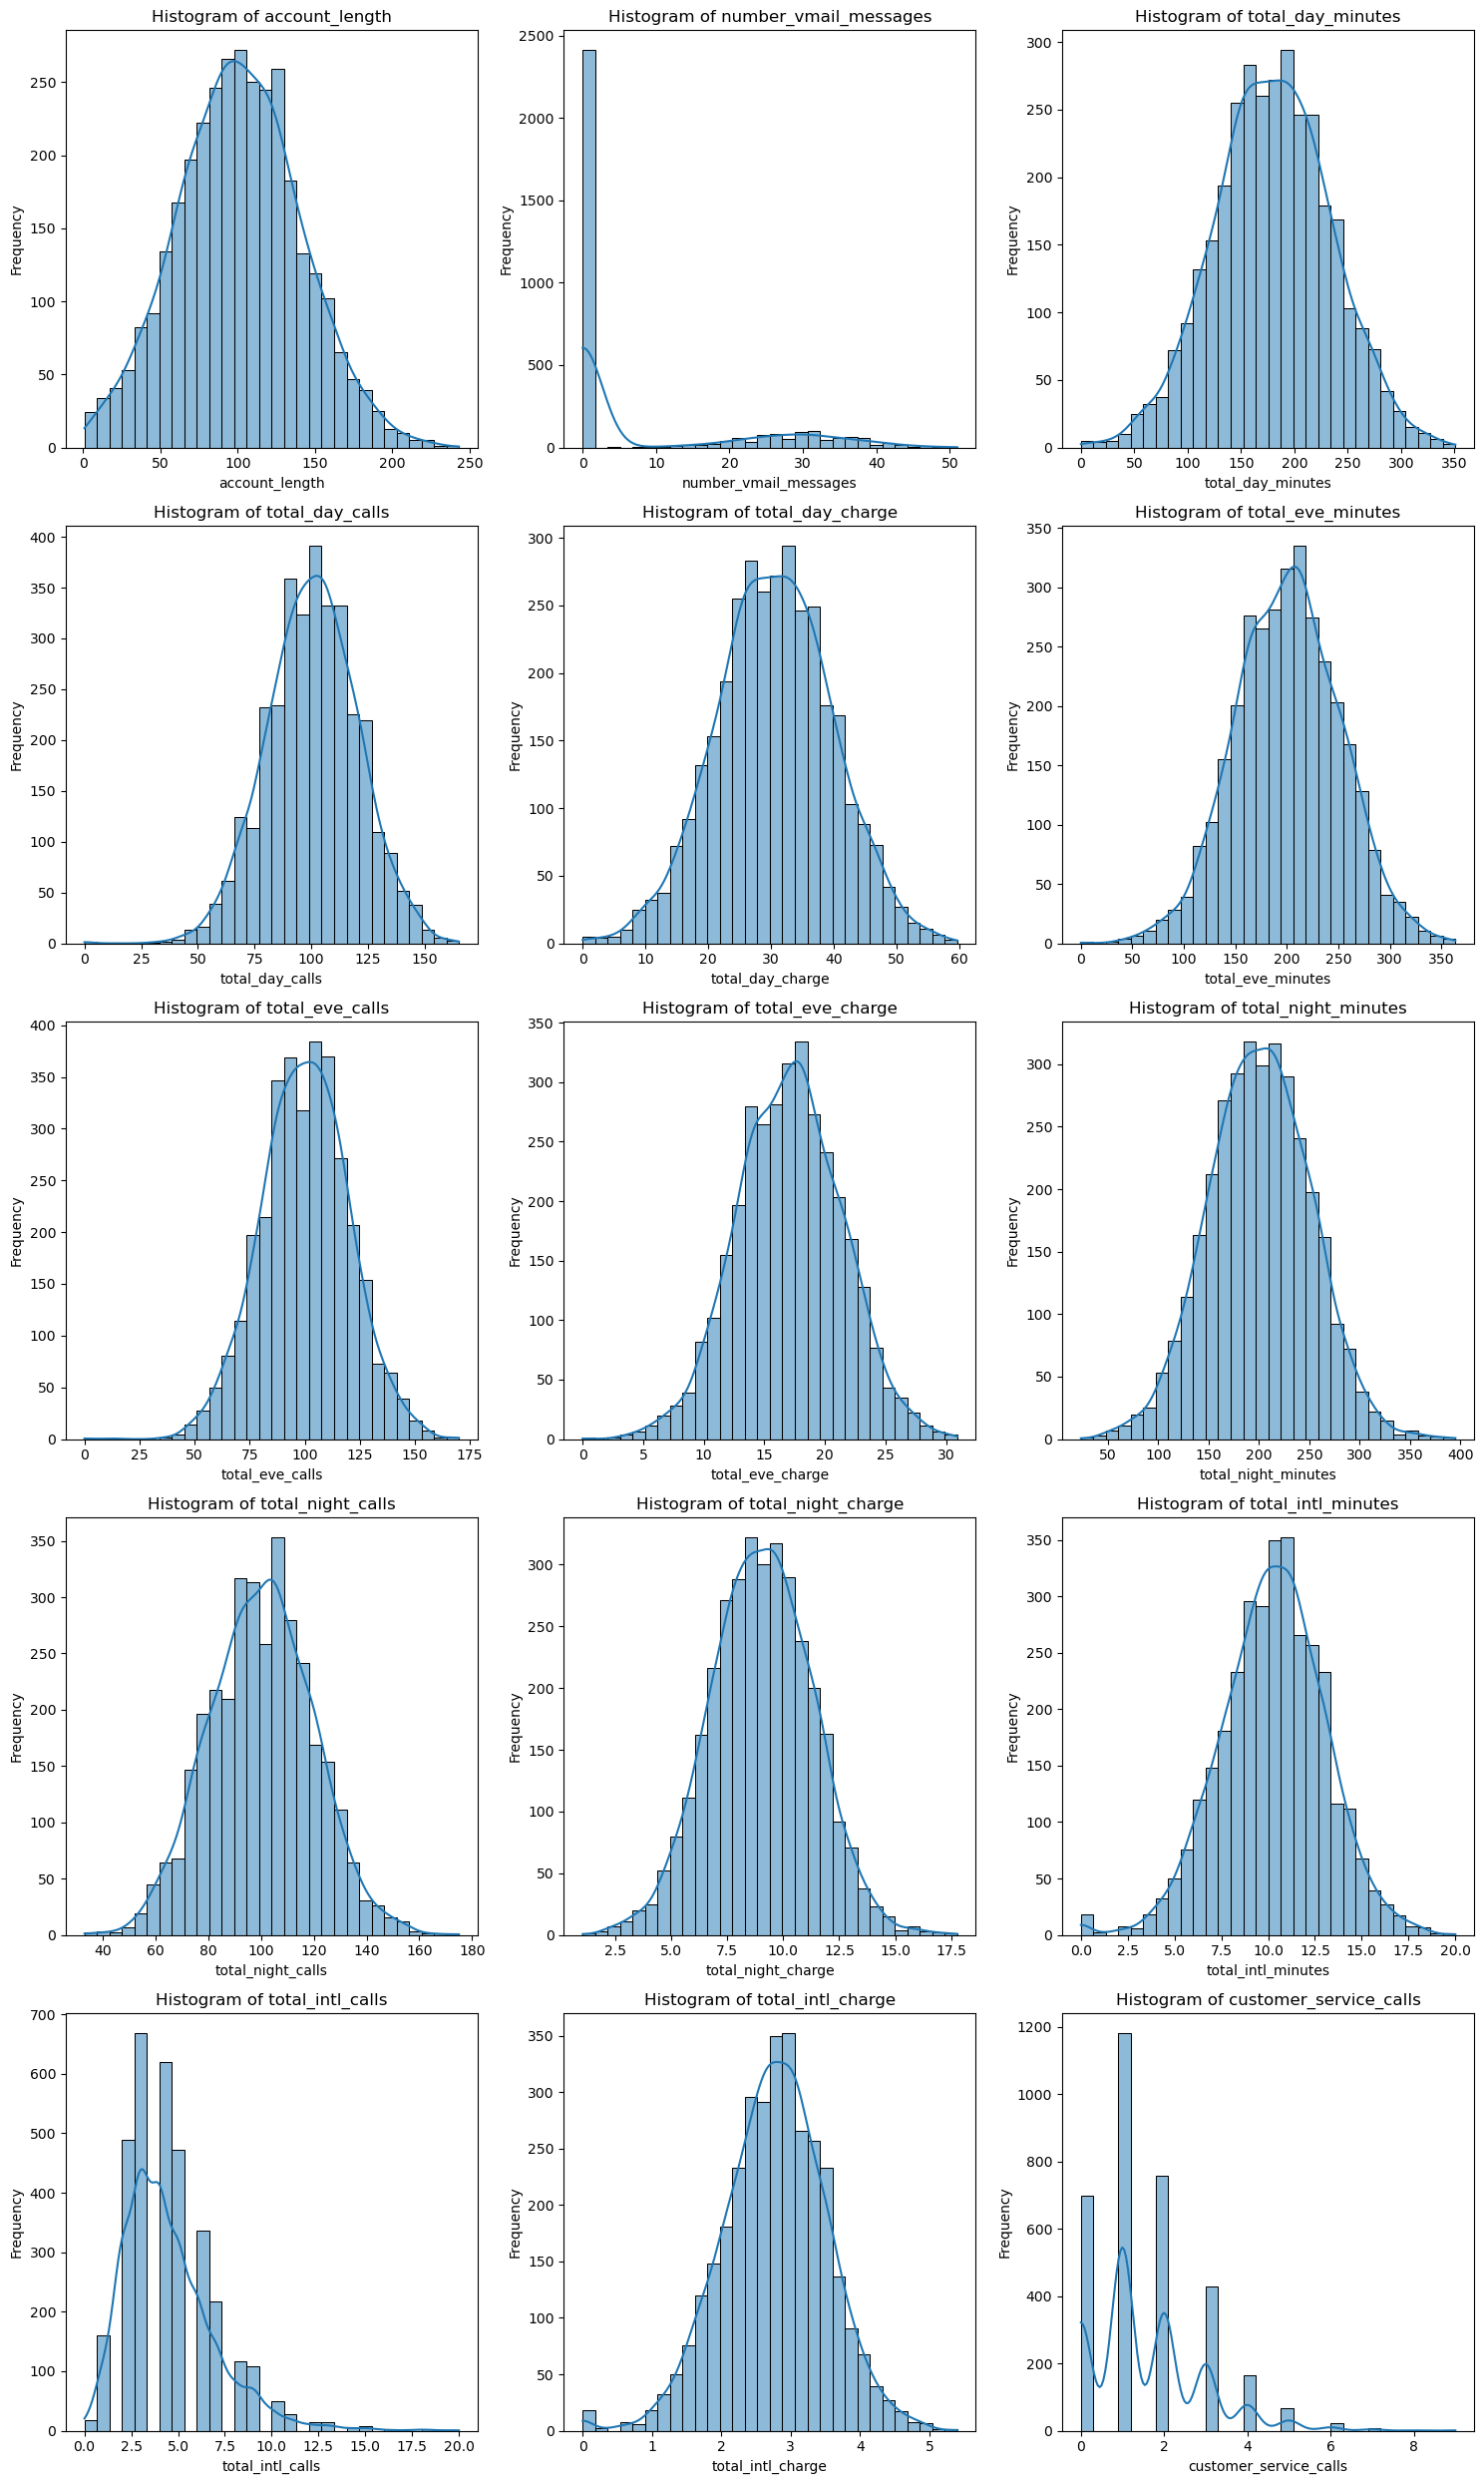

In [22]:
numerical_cols = churn_numeric.columns
# Determine the number of rows and columns for the grid
num_cols = 3  # Adjust based on your preference
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Compute number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * num_rows))

# Create a histogram for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(churn_numeric[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



We notice that most of the numerical columns' ditributions follow a normal distribution curve with the exception of `voice_mail_messages` and `customer_service_calls`. `Total_intl_calls` has a right skewed distribution.

### 4.2 Bivariate Analysis

In this section,we explore the relationship or association between two variables in the dataset. It allows us to examine how changes in one variable are related to changes in another variable.

## 5. Data Modelling

## 6. Evaluation

## 7. Findings & Conclusions

## 8. Recommendations